In [1]:
import pandas as pd
import numpy as np
from category_encoders import OneHotEncoder

In [2]:
X = pd.read_csv('../KivaLoans_data/X_matrix.csv')

X.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
y = pd.read_csv('../KivaLoans_data/y_matrix.csv')

y = y['loan_funded']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
ohe = OneHotEncoder()
#X_train = ohe.fit_transform(X_train)

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
rf1 = RandomForestClassifier()

In [8]:
from sklearn.pipeline import Pipeline
rf_pipe = Pipeline([('ohe', ohe), ('rf', rf1)])

In [9]:
rf_pipe

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(cols=None, drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=False,
                               verbose=0)),
                ('rf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_jobs=None,
                  

In [10]:
from sklearn.metrics import mean_squared_error, make_scorer

rmse = make_scorer(mean_squared_error, greater_is_better=False, squared=False)

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
params1 = {
    'rf__n_estimators': [100, 250, 500, 750],
    'rf__min_samples_leaf': [1, 3, 5],
}

In [ ]:
# gsearch1 = GridSearchCV(rf_pipe, params1, scoring=rmse, n_jobs=-1, cv=5)

# gsearch1.fit(X_train, y_train)

In [13]:
rf_pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(cols=['activity', 'sector', 'country',
                                     'currency', 'repayment_interval',
                                     'posted_day'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('rf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
        

In [14]:
rf_pipe.score(X_test, y_test)

0.9611793685005116

In [19]:
preds1 = rf_pipe.predict(X_test)
preds_proba1 = rf_pipe.predict_proba(X_test)

In [20]:
rmse(rf_pipe, X_test, y_test)

-0.19702951936064933

In [24]:
feats1 = rf_pipe.steps[0][1].get_feature_names()

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<BarContainer object of 351 artists>

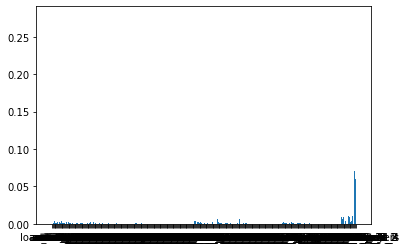

In [27]:
plt.bar(feats1, rf_pipe.steps[1][1].feature_importances_)

In [28]:
feat_imp1 = pd.Series(rf_pipe.steps[1][1].feature_importances_, index=feats1).sort_values(ascending=False)

Text(0.5, 0, 'Feature')

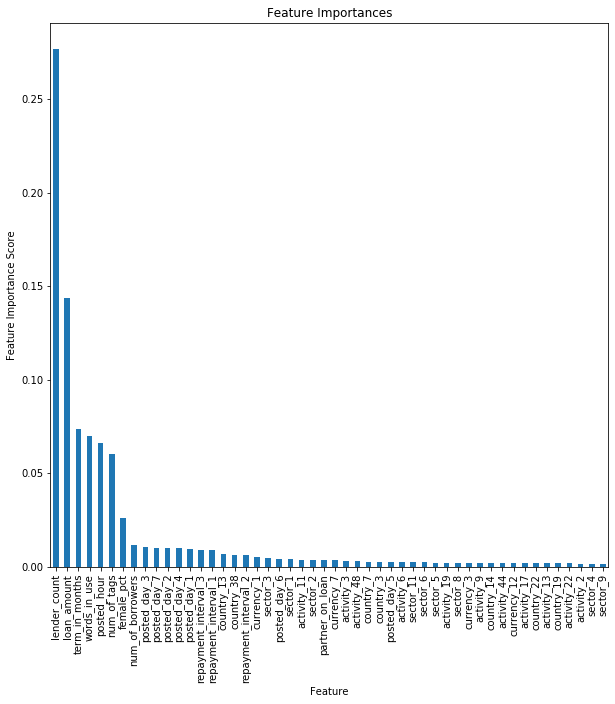

In [34]:
plt.figure(figsize=(10, 10))
feat_imp1[:50].plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')
plt.xlabel('Feature')

In [32]:
feat_imp1.cumsum()

0.9004159765934285

In [35]:
import pickle

In [37]:
with open('rfc_pipe1.pickle', 'wb') as f:
    pickle.dump(rf_pipe, f)

In [38]:
loaded_model = pickle.load(open('rfc_pipe1.pickle', 'rb'))

In [39]:
loaded_model

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(cols=['activity', 'sector', 'country',
                                     'currency', 'repayment_interval',
                                     'posted_day'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', return_df=True,
                               use_cat_names=False, verbose=0)),
                ('rf',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
        

In [40]:
loaded_model.score(X_test, y_test)

0.9611793685005116